# Implementando *k-Nearest Neighbors* (k-NN) para Classificação de Estrelas RR Lyrae

Ao explorar conceitos avançados como redes neurais convolucionais, *transformers* e Inteligência Artificial (IA) Generativa, é natural questionar a relevância de métodos clássicos como o k-Nearest Neighbors (k-NN) em 2024.

Essa dúvida surge frequentemente, pois, seduzidos pela *hype* de tecnologias emergentes, muitos profissionais adotam uma "visão de túnel", focando excessivamente em uma única técnica e negligenciando o valor das abordagens fundamentais que formaram a base para os avanços atuais. É como o ditado que diz: "Quando tudo que você tem é um martelo, tudo parece um prego".

Porém, o conhecimento em tecnologia não é apenas sobre teoria; é sobre ter um arsenal variado de ferramentas para abordar problemas diversificados. Idealmente, após uma análise detalhada do contexto empresarial, você definiria métricas e cenários para abordar a questão de maneira eficaz e eficiente. Assim como não utilizamos um míssil AIM-9X Sidewinder para eliminar uma barata, o uso de Deep Learning para todas as situações pode ser excessivo.

Existem muitos casos em que a aplicação do k-NN pode ser a solução mais direta e prática. Então me acompanhe neste artigo para aprender como implementar essa técnica usando a biblioteca `Scikit-Learn`.


## Como funciona o k-NN

O k-NN é reconhecido como um dos algoritmos de classificação mais intuitivos e simples em machine learning. Diferente de outros métodos que "aprendem" padrões em um conjunto de dados, o k-NN opera sob a premissa de que dados similares tendem a se agrupar no espaço de características. Isso significa que o k-NN utiliza a distância entre vetores de *features* para realizar suas predições, dependendo diretamente dessa métrica para classificar novos pontos.

Considere pares $(X_1, Y_1), (X_2, Y_2), \dots, (X_n, Y_n)$ em $\mathbb{R}^d \times \{1, 2\}$, onde $X$ representa os atributos dos pontos de dados em um espaço d-dimensional, e $Y$ é o rótulo da classe de $X$, indicando a qual das duas classes o ponto pertence.

<img src="knn.png" width=800>

Cada $X$ condicional a $Y=r$ segue uma distribuição de probabilidade $P_r$ para $r=1, 2$. Isso significa que, dado um rótulo de classe específico, a distribuição dos pontos de dados em $X$ segue um padrão específico, descrito pela distribuição \(P_r\).

Dada uma norma $\|\cdot\|$ em $\mathbb{R}^d$ e um ponto $x \in \mathbb{R}^d$, ordenamos os dados de treinamento tal que $(X_{(1)}, Y_{(1)}), \dots, (X_{(n)}, Y_{(n)})$ de forma que $\|X_{(1)} - x\| \leq \dots \leq \|X_{(n)} - x\|$. Em outras palavras, reorganizamos os dados de treinamento com base na proximidade de cada ponto $X_i$ ao ponto de consulta $x$, do mais próximo ao mais distante.

### Intuição por trás do k-NN

Imagine que você queira classificar os ingredientes da sua despensa com base em duas *features* que você supõe, possam ser mensuradas pelo seu paladar perspicaz: doçura e crocância. Cada ingrediente foi cuidadosamente provado e mensurado em uma escala arbitrária, e o resultado pode ser observado na imagem abaixo, retirada do livro [Machine Learning with R (Brett Lantz, 2019)](https://amzn.to/3NLvN6x).

<img src="ingredients_knn.png" width=800>

As frutas, geralmente mais doces, agrupam-se na parte mais afastada da origem em relação ao eixo x, enquanto as verduras, menos doces e mais crocantes, e as proteínas, menos doces e menos crocantes, se agrupam em áreas distintas do gráfico. Este padrão visual nos fornece uma pista clara: a doçura e a crocância são bons indicadores para classificar um ingrediente disponíveis na nossa lista.

Agora, digamos que temos uma fruta desconhecida e queremos classificá-la usando k-NN. Começamos localizando a fruta no gráfico baseando-nos em sua doçura e crocância. Em seguida, selecionamos um número 'k' de pontos de dados mais próximos - neste caso, os ingredientes mais próximos no gráfico.

Se escolhermos, por exemplo, k=3, identificaremos os três ingredientes mais próximos da nossa fruta desconhecida no gráfico. Se dois deles forem 'frutas' e um for 'vegetal', então, pela regra da maioria, o k-NN classificará a fruta desconhecida como 'fruta'. Esse processo é intuitivo e espelha a forma como muitas vezes fazemos escolhas baseadas em semelhanças óbvias.

Obviamente esse foi um exemplo didático e intuitivo. Mas para lidar com problemas reais, é essencial escolher um valor adequado para 'k', além de uma métrica de distância que reflita a natureza e dimensionalidade dos dados.


### Métricas de Distância

As métricas de distância são fundamentais no algoritmo k-NN, pois definem como a "proximidade" entre os pontos de dados é calculada. Aqui estão algumas métricas mais comumente utilizadas:

**Distância Euclidiana:** A mais comum e intuitiva entre as métricas, usada para medir a distância linear entre dois pontos, sendo particularmente útil quando as imagens ou pontos de dados são representados em um espaço euclidiano, fornecendo uma medida direta da "linha reta" entre eles. Se tivermos dois pontos, $P = (p_1, p_2, ..., p_n)$ e $Q = (q_1, q_2, ..., q_n)$ em um espaço $n$-dimensional, a distância Euclidiana entre eles é dada por:

$$
d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2}
$$

**Distância Manhattan (city block):** Também conhecida como norma L1, esta métrica mede a distância entre dois pontos se movendo apenas em linhas retas ao longo dos eixos (como um táxi se movendo em uma grade de ruas da cidade), sendo adequada para quando o caminho entre pontos é uma grade. Para os mesmos pontos $P$ e $Q$ acima, a distância Manhattan é calculada como:

$$
d(P, Q) = |p_1 - q_1| + |p_2 - q_2| + \cdots + |p_n - q_n|
$$

**Outras métricas:** Dependendo do tipo de dados e do problema, outras métricas de distância podem ser mais apropriadas, como a distância de Minkowski. Generalização das distâncias Euclidiana e Manhattan, é definida como $ (\sum{|p_i - q_i|^r})^{1/r} $, onde $r$ é um parâmetro que determina a natureza da distância.

### Como escolher o k

A escolha de 'k' no algoritmo k-NN pode variar significativamente dependendo do conjunto de dados. Não existe uma regra única. Mas com base na experiência, aqui estão algumas diretrizes gerais:

- Um $k$ pequeno, como 3 ou 5, geralmente é uma boa escolha para evitar a influência de *outliers* e manter a decisão localizada próxima ao ponto de interrogação. No entanto, um valor muito baixo pode ser sensível a ruídos nos dados.

- Um $k$ maior oferece uma decisão mais "democrática", considerando mais vizinhos, o que pode ser útil para conjuntos de dados com muita variação. Contudo, um valor muito grande pode suavizar demais as fronteiras de decisão, levando a classificações menos precisas.

Uma técnica comum é usar validação cruzada para experimentar diferentes valores de $k$ e escolher aquele que oferece o melhor desempenho no conjunto de validação. Isso ajuda a encontrar um equilíbrio entre subajuste e sobreajuste. Acima de tudo, a escolha deve levar em conta os *insights* gerados durante a fase do *business understanding*. 

## Classificação com K-Nearest Neighbors (k-NN) usando Scikit-Learn

Agora que já passamos pela apresentação e conceituação do k-NN, vamos ver como podemos usar o `scikit-learn` para problemas de classificação em aprendizado supervisionado. Antes de irmos para um projeto mais prático, vamos primeiro usar a biblioteca `numpy` do Python para gerar valores aleatórios e ver como eles estão distribuídos.

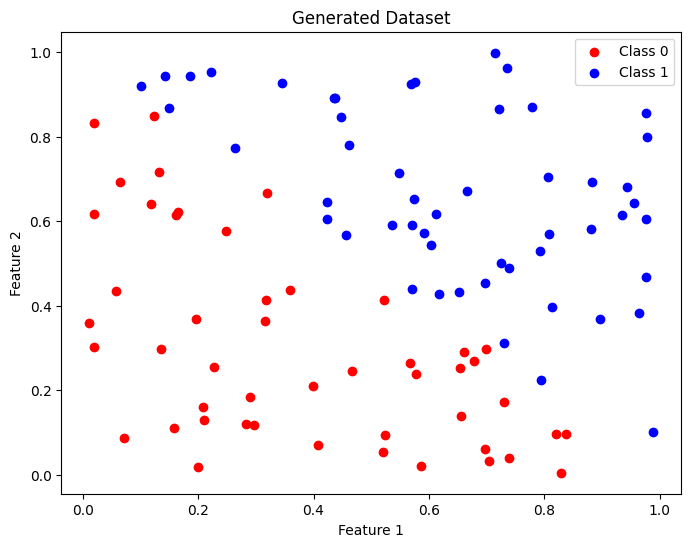

In [1]:
# Importing the necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Generating a random dataset
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 points in 2 dimensions
y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0)  # Classification based on the sum of features

# Visualizing the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

%matplotlib inline

Os *samples* gerados foram distribuídos entre os *labels* `Class 0` e `Class 1`. Agora, se quisermos identificar a fronteira de decisão, precisamos antes treinar o modelo. Para isso, defini o número de vizinhos mais próximos como $k = 3$, e depois deinstanciar um objeto `KNeighborsClassifier`, basta executar o método `knn.fit(X, y)` com os dados sintéticos.

Importante lembrar que durante esse processo, o modelo k-NN não aprende uma função discriminativa como em outros métodos de aprendizado supervisionado; em vez disso, ele memoriza os exemplos de treinamento. Posteriormente, ao fazer previsões, ele utiliza esses dados memorizados para encontrar os `k`` vizinhos mais próximos de um novo ponto e realiza uma votação baseada nos rótulos desses vizinhos para determinar a classificação.

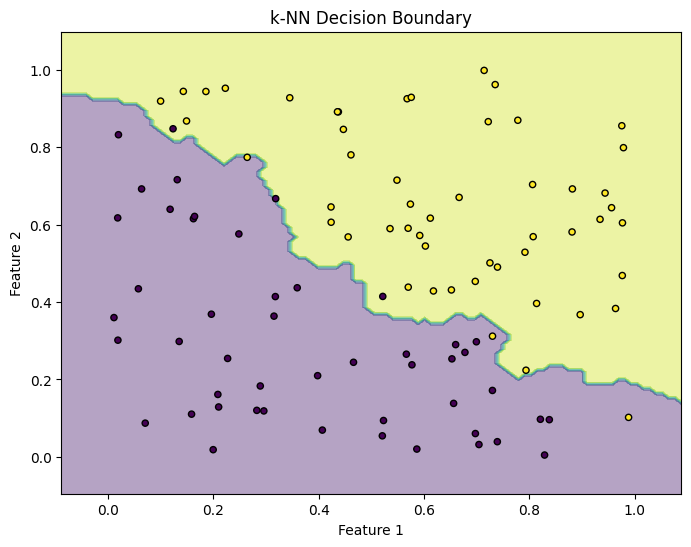

In [2]:
# Defining the number of neighbors
k = 3

# Creating the k-NN model
knn = KNeighborsClassifier(n_neighbors=k)

# Training the model with the generated data
knn.fit(X, y)

# Generating test points for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizing the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('k-NN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Nesee exemplo básico, o objetivo foi apenas demonstrar a implementação e a aplicação do k-NN em um conjunto de dados sintéticos. Mas que tal aproveitar a inércia e usar a mesma técnica para para classificação de estrelas RR Lyrae?

## Aplicando k-NN para Classificar Estrelas RR Lyrae

Nesta última parte do artigo, vamos usar o algoritmo k-NN para classificar estrelas variáveis RR Lyrae, um tipo distinto de estrelas pulsantes usadas como importantes marcadores astronômicos para medir a galáxia e a expansão do universo.

<img src="plot_sdss_filters_1.png">

As RR Lyrae têm características periódicas bem definidas, que permitem que astrônomos as identifiquem e estudem suas propriedades em detalhes. O conjunto de dados que utilizaremos pode ser baixado facilmente através do pacote `astroML`.

Especificamente, a função `fetch_rrlyrae_combined` já faz o trabalho de combinar dados fotométricos das estrelas RR Lyrae com cores padrões do Sloan Digital Sky Survey (SDSS), e nos retorna a diferença entre as magnitudes medidas em cada um dos cinco filtros fotométricos:

- **X**: Matriz de características, contendo as diferenças de cor (u-g, g-r, r-i, i-z) entre os 5 filtros para cada estrela. Por isso, a dimensionalidade de **X** é $(n\_samples, 4)$, onde cada coluna representa uma das diferenças de cor calculadas.
- **y**: Vetor de rótulos, onde 1 indica uma estrela RR Lyrae e 0 uma estrela de fundo.

In [4]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from astroML.datasets import fetch_rrlyrae_combined
import numpy as np  # Adding this import for array operations

# Defining the directory where the data will be saved
DATA_HOME = './data'

# Loading the data
X, y = fetch_rrlyrae_combined(data_home=DATA_HOME)

# Initial exploration
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Number of RR Lyrae stars:", np.sum(y == 1))
print("Number of background stars:", np.sum(y == 0))

# Statistical analysis
print("Basic statistics for each column of X (u-g, g-r, r-i, i-z):")
print("Mean:", np.mean(X, axis=0))
print("Median:", np.median(X, axis=0))
print("Standard deviation:", np.std(X, axis=0))

Shape of X: (93141, 4)
Shape of y: (93141,)
Number of RR Lyrae stars: 483
Number of background stars: 92658
Basic statistics for each column of X (u-g, g-r, r-i, i-z):
Mean: [0.9451376  0.3240073  0.12292135 0.0672943 ]
Median: [0.941      0.33600044 0.12800026 0.05599976]
Standard deviation: [0.10446888 0.06746367 0.04031635 0.05786987]


Após executar a célula acima, os dados serão baixados dentro da pasta `./data`. Vamos aproveitar para dar uma olhada rápida em uma amostra do *dataset* e fazer uma comparação visual entre as duas classes.

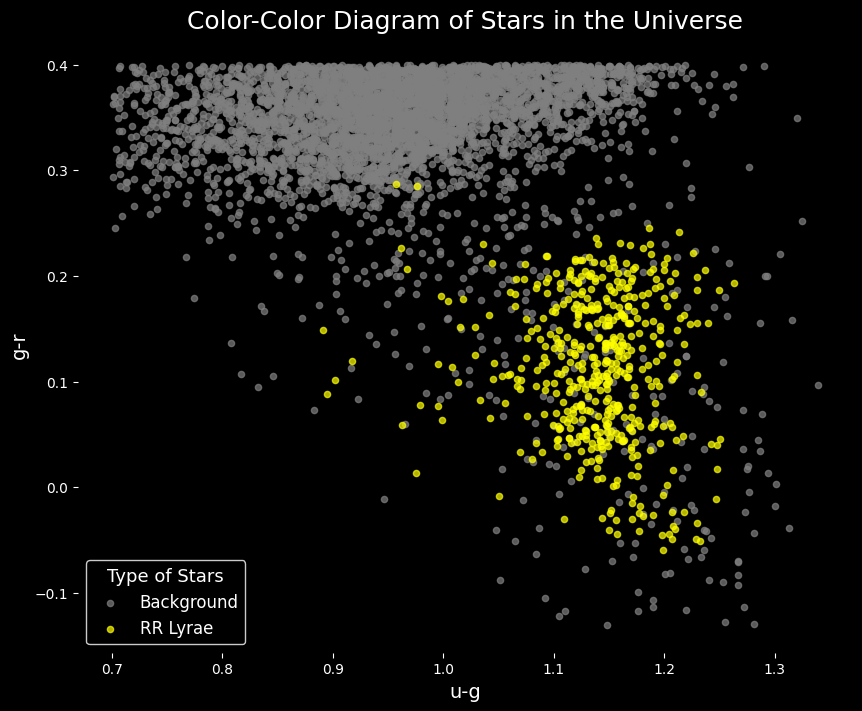

In [5]:
# Selecting a sample for easier visualization
X_sample = X[-5000:]
y_sample = y[-5000:]

# Split stars from RR Lyrae based on the value of y
X_rrlyrae = X_sample[y_sample == 1]
X_background = X_sample[y_sample == 0]

# Creating an enhanced scatter plot of the data with a black background
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting background stars
ax.scatter(X_background[:, 0], X_background[:, 1], color='grey', s=20, label='Background', alpha=0.7)

# Plotting RR Lyrae stars
ax.scatter(X_rrlyrae[:, 0], X_rrlyrae[:, 1], color='yellow', s=20, label='RR Lyrae', alpha=0.7)

# Enhancing the plot with titles and labels
ax.set_title('Color-Color Diagram of Stars in the Universe', fontsize=18, color='white')
ax.set_xlabel('u-g', fontsize=14, color='white')
ax.set_ylabel('g-r', fontsize=14, color='white')

# Remove grid and borders
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Adding a legend with a white font color
ax.legend(title='Type of Stars', title_fontsize='13', fontsize='12', facecolor='black', edgecolor='white', labelcolor='white')

# Displaying the plot
plt.show()

O primeiro passo no código é dividir os dados em conjuntos de treinamento e teste usando a função `train_test_split` do módulo `sklearn.model_selection`. O parâmetro `test_size` está definido como 0,2, o que significa que 20% dos dados serão usados para teste e os 80% restantes para treinamento. O parâmetro `random_state` está definido como 42 para garantir que as divisões geradas sejam reproduzíveis.

Em seguida, o classificador KNN é inicializado com `n_neighbors=5`, dado que a quantidade de entradas é consideravelmente maior que aquele nosso primeiro exemplo do artigo. O classificador é então treinado usando o método `fit`, que recebe os dados de treinamento e os `labels` como argumentos.

Uma vez que concluio a fase de treinamento, o classificador já pode ser testado usando o método `predict`.  Como você pode acompanhar, os dados de teste foram utilizados para avaliar o desempenho do classificador, juntamente com as funções `classification_report`, `confusion_matrix` e `accuracy_score`. Por fim, eu coloquei dois plots para fazer uma comparação visual. 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18530
         1.0       0.67      0.61      0.63        99

    accuracy                           1.00     18629
   macro avg       0.83      0.80      0.82     18629
weighted avg       1.00      1.00      1.00     18629

Confusion Matrix:
 [[18500    30]
 [   39    60]]
Accuracy: 0.9962960974824199


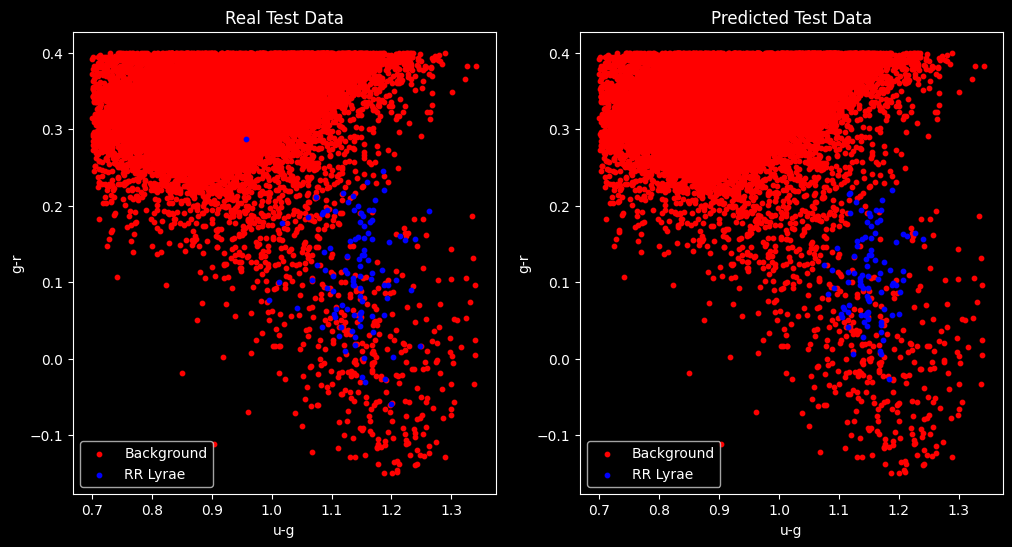

In [6]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)

# Evaluate the classifier
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Background', s=10)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='RR Lyrae', s=10)
plt.title('Real Test Data')
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='red', label='Background', s=10)
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='blue', label='RR Lyrae', s=10)
plt.title('Predicted Test Data')
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.legend()

plt.show()


A análise do resultado apresentado revela um desempenho satisfatório para um modelo simples de classificação, como o k-NN. O relatório indica que o modelo é altamente preciso em identificar a classe `0` e também é eficaz em recuperar instâncias dessa classe. Por outro lado, a classe `1`, alvo de maior interesse nosso, exibe um desempenho  inferior, com uma precisão de 0.67 e recall de 0.61, indicando que o modelo tem uma precisão razoável, mas está perdendo algumas instâncias dessa classe.

A métrica F1-score, que combina precisão e recall, é de 0.63 para a classe 1.0. A acurácia geral é de 0.996, o que sugere que o modelo está fazendo previsões corretas na grande maioria das instâncias. A matriz de confusão também fornece informações detalhadas sobre os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

No entanto, para os propósitos deste artigo, o modelo atende ao seu objetivo didático, demonstrando o quão rápido e simples o k-NN pode ser como uma ferramenta de classificação.